In [126]:
import pandas as pd

In [127]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"

df = pd.read_csv(url)
df.head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]>

In [128]:
df = df.drop(["embark_town", "fare", "embarked", "alive", "alone", "adult_male"], axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,class,who,deck
0,0,3,male,22.0,1,0,Third,man,NaN
1,1,1,female,38.0,1,0,First,woman,C
2,1,3,female,26.0,0,0,Third,woman,NaN
3,1,1,female,35.0,1,0,First,woman,C
4,0,3,male,35.0,0,0,Third,man,NaN


In [129]:
sex_map = {"male": 0, "female": 1}
df["sex"] = df["sex"].map(sex_map)

class_map = {"First": 1, "Second": 2, "Third": 3}
df["class"] = df["class"].map(class_map)

who_map = {"man": 1, "woman": 2, "child": 3}
df["who"] = df["who"].map(who_map)

deck_map = {"A": 1, "B": 2, "C":3}
df["deck"] = df["deck"].map(deck_map)

df.head()

,survived,pclass,sex,age,sibsp,parch,class,who,deck
0,0,3,0,22.0,1,0,3,1,NaN
1,1,1,1,38.0,1,0,1,2,3.0
2,1,3,1,26.0,0,0,3,2,NaN
3,1,1,1,35.0,1,0,1,2,3.0
4,0,3,0,35.0,0,0,3,1,NaN


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   class     891 non-null    int64  
 7   who       891 non-null    int64  
 8   deck      121 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [131]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
class,0
who,0
deck,770


In [132]:
from numpy import int64
df["age"] = df["age"].fillna(df["age"]).mean()
df["deck"] = df["deck"].fillna(df["deck"]).mean()

df["age"] = df["age"].round()
df["deck"] = df["deck"].round()

df["age"] = df["age"].astype(int64)
df["deck"] = df["deck"].astype(int64)

df.head()

,survived,pclass,sex,age,sibsp,parch,class,who,deck
0,0,3,0,30,1,0,3,1,2
1,1,1,1,30,1,0,1,2,2
2,1,3,1,30,0,0,3,2,2
3,1,1,1,30,1,0,1,2,2
4,0,3,0,30,0,0,3,1,2


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  891 non-null    int64
 1   pclass    891 non-null    int64
 2   sex       891 non-null    int64
 3   age       891 non-null    int64
 4   sibsp     891 non-null    int64
 5   parch     891 non-null    int64
 6   class     891 non-null    int64
 7   who       891 non-null    int64
 8   deck      891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB


In [134]:
from sklearn.model_selection import train_test_split

X = df[["pclass", "sex", "age", "sibsp", "parch", "class", "who", "deck"]]
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 42)

In [141]:
from sklearn.linear_model import LogisticRegression

model_log_regression = LogisticRegression(multi_class = 'multinomial')
model_log_regression.fit(X_train, y_train)

y_pred_logreg = model_log_regression.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [142]:
from sklearn.metrics import accuracy_score, recall_score

print(accuracy_score(y_test, y_pred_logreg))
print(recall_score(y_test, y_pred_logreg))

0.8156424581005587
0.6811594202898551


In [137]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=4)
dt.fit(X_train, y_train)
y_pred_tree = dt.predict(X_test)

In [143]:
print(accuracy_score(y_test, y_pred_tree))
print(recall_score(y_test, y_pred_tree))

0.7988826815642458
0.782608695652174


In [139]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [144]:
print(accuracy_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))

0.8044692737430168
0.6666666666666666


In [145]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, max_depth=4, random_state = 42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [146]:
print(accuracy_score(y_test, y_pred_gb))
print(recall_score(y_test, y_pred_gb))

0.7821229050279329
0.6811594202898551


In [147]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate = 0.1, max_depth=4, random_state = 42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [148]:
print(accuracy_score(y_test, y_pred_xgb))
print(recall_score(y_test, y_pred_xgb))

0.7932960893854749
0.6811594202898551


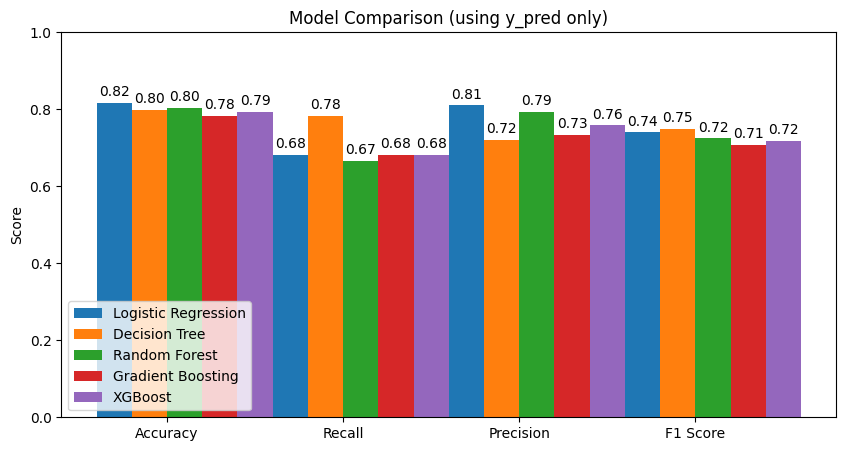

In [153]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": y_pred_logreg,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "XGBoost": y_pred_xgb
}

results = {}
for model, y_pred in models.items():
  results[model] = [
      accuracy_score(y_test, y_pred),
      recall_score(y_test, y_pred),
      precision_score(y_test, y_pred),
      f1_score(y_test, y_pred)
  ]

metrics_name = ["Accuracy", "Recall", "Precision", "F1 Score"]
x = np.arange(len(metrics_name))
width = 0.2

fig, ax = plt.subplots(figsize=(10,5))
for i, (model, vals) in enumerate(results.items()):
    bars = ax.bar(x + i*width, vals, width, label=model)

    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,  # center x of bar
            height + 0.01,                     # slightly above bar
            f'{height:.2f}',                   # show 2 decimals
            ha='center', va='bottom'
        )

ax.set_xticks(x + width*1.5)
ax.set_xticklabels(metrics_name)
ax.set_ylim(0,1)
ax.set_ylabel("Score")
ax.set_title("Model Comparison (using y_pred only)")
ax.legend()
plt.show()